In [1]:
from sklearn.datasets import fetch_olivetti_faces

In [2]:
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/fangcheng/scikit_learn_data


In [4]:
faces

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
         0.1570248 ],
        [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
         0.15289256],
        [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
         0.15289256],
        ...,
        [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
         0.19008264],
        [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
         0.60330576],
        [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
         0.38429752]], dtype=float32),
 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
          0.3305785 , 0.30578512],
         [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
          0.338843  , 0.3140496 ],
         [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
          0.338843  , 0.29752067],
         ...,
         [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
     

In [5]:
# VSM转换
# 图片扁平化处理
data = faces.data
images = faces.images

In [6]:
images.shape

(400, 64, 64)

In [7]:
# 导入基本包
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

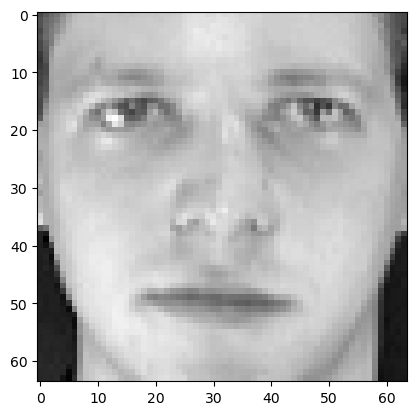

In [8]:
plt.imshow(images[0],cmap="gray")

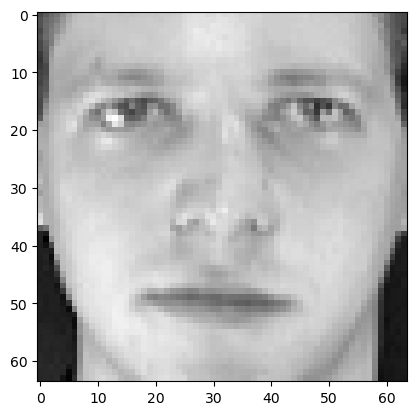

In [9]:
plt.imshow(data[0].reshape(images[0].shape),cmap="gray")

In [10]:
data.shape

(400, 4096)

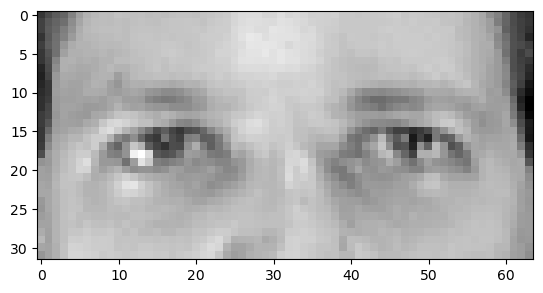

In [11]:
upper_face = data[0][:2048].reshape((32,64))
plt.imshow(upper_face,cmap="gray")

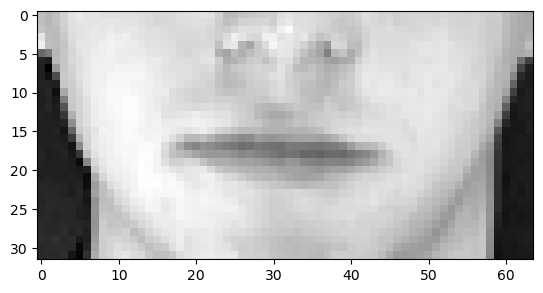

In [12]:
upper_face = data[0][2048:].reshape((32,64))
plt.imshow(upper_face,cmap="gray")

In [13]:
# 一共有40个人，每人是十张照片
target = faces.target
target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [14]:
# 应该保证每一个人都参与过训练，这样才能给出任意一个人的上半张脸，来预测下半张脸
# 保留每个人的前9张照片
X_train = []
y_train = []
# 保留每个人的最后一张照片
X_test = []
y_test = []
# 所以把每个人的10张照片，前9张作为训练集，留一张作为测试集
# 外层循环用来遍历每一个人，因为哟工是40个人
# 内层循环用来遍历某一个人的10张照片
index = 0
for face in range(40):
    for photo in range(10):
        face_data = data[index]
        upper_face = face_data[:2048]
        bottom_face = face_data[2048:]
        index +=1
        if photo <= 8:
            X_train.append(upper_face)
            y_train.append(bottom_face)
        else:
            X_test.append(upper_face)
            y_test.append(bottom_face)

In [15]:
np.array(X_train).shape, np.array(X_test).shape

((360, 2048), (40, 2048))

In [17]:
np.array(y_train).shape, np.array(y_test).shape

((360, 2048), (40, 2048))

In [18]:
# 建模
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [19]:
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [20]:
# 预测测试集
y_ = knn.predict(X_test)

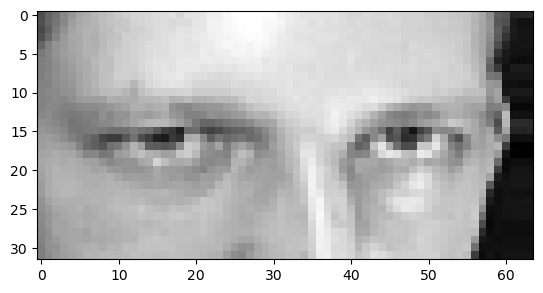

In [22]:
# 查看真实的上半张人脸图像
plt.imshow(X_test[0].reshape((32,64)), cmap="gray")

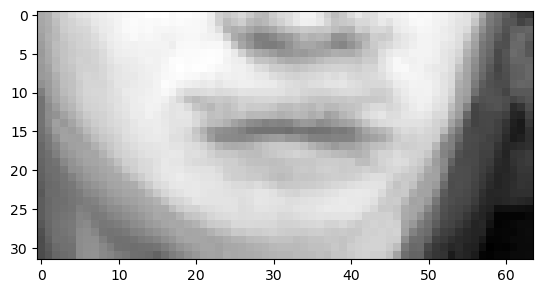

In [23]:
# 查看预测下半张人脸的图像
plt.imshow(y_[0].reshape((32,64)), cmap="gray")

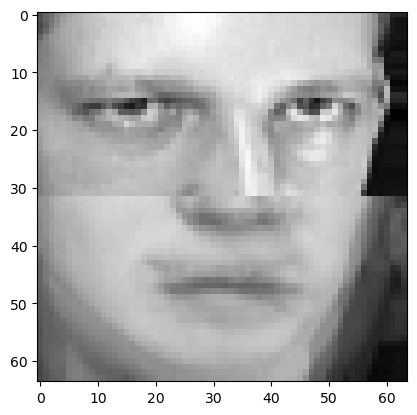

In [25]:
# 整合预测结果和真实结果的完整图像
plt.imshow(np.concatenate((X_test[0],y_[0])).reshape((64,64)),cmap="gray")

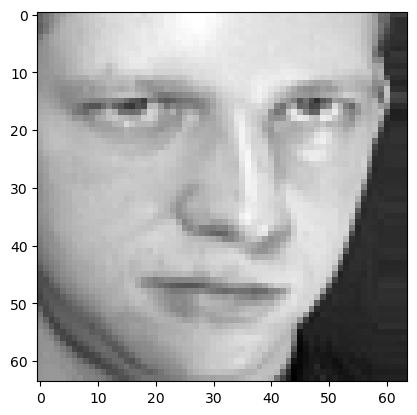

In [26]:
# 真实图像
plt.imshow(np.concatenate((X_test[0],y_test[0])).reshape((64,64)),cmap="gray")

In [28]:
linear = LinearRegression()
knn = KNeighborsRegressor()
ridge = Ridge()
lasso = Lasso()

linear.fit(X_train,y_train)
knn.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

Lasso()

In [29]:
# 让所有的模型都进行训练和预测
knn_y_ = knn.predict(X_test)
linear_y_ = linear.predict(X_test)
ridge_y_ = ridge.predict(X_test)
lasso_y_ = lasso.predict(X_test)

In [30]:
# 先把牙展示的所有数据整合成一个字典，方便迭代
result_dict ={
    "TRUE":y_test,
    "KNN":knn_y_,
    "LINEAR":linear_y_,
    "RIDGE":ridge_y_,
    "LASSO":lasso_y_
}

In [31]:
np.array(y_test).shape

(40, 2048)

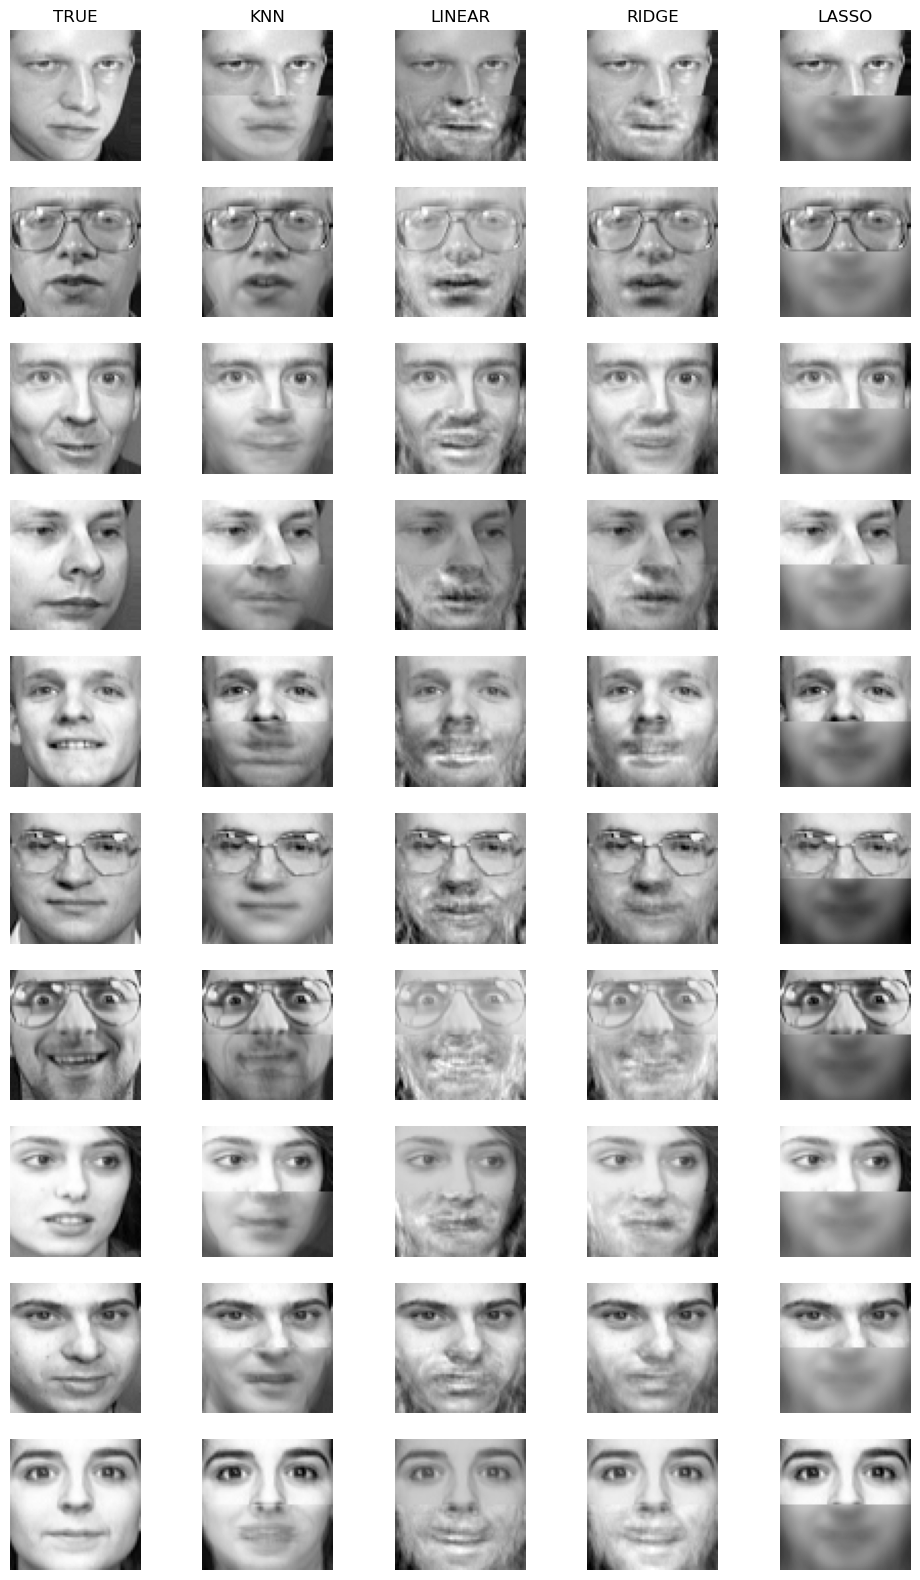

In [41]:
plt.figure(figsize=(12,20))
loc = 1
# 遍历出测试集合中的前5个数据，X_test[:5]
for index in range(10):
#     获取测试数据中的每一张脸的上半部分
    upper_face = X_test[index]
#     内层循环是列方向的便利，每一个vslue是一个列表，里面存放每一个模型对X_test的全部预测结果
    for key, value in result_dict.items():
        plt.subplot(10,5,loc)
        loc += 1
#         value要使用于X_test相同的索引来获取数据，获取的数据就是下半张脸（除了第一个value之外，都是各个模型的预测结果
        bottom_face = value[index]
#     上半张脸和下半张脸做拼接，形成一张完整的脸
        face = np.concatenate((upper_face,bottom_face))
#     展示数据
        plt.imshow(face.reshape((64,64)), cmap="gray")
        plt.axis("off")
        if index == 0:
            plt.title(key)
    